In [ ]:
!git clone https://github.com/greydanus/mnist1d.git
%cd mnist1d

Cloning into 'mnist1d'...
remote: Enumerating objects: 541, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 541 (delta 67), reused 66 (delta 66), pack-reused 465 (from 1)
Receiving objects: 100% (541/541), 14.54 MiB | 11.09 MiB/s, done.
Resolving deltas: 100% (259/259), done.
/content/mnist1d


In [ ]:
import torch
import pickle
from urllib.request import urlopen
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

def scale(x):
  xMin = x.min(axis=1,keepdims=True)
  xMax = x.max(axis=1,keepdims=True)
  return (x-xMin)/(xMax-xMin+1e-8)

url = "https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl"
data = pickle.load(urlopen(url))
x_trainRaw,y_train = data['x'],data['y']
x_testRaw,y_test = data['x_test'], data['y_test']

x_train = scale(x_trainRaw)
x_test = scale(x_testRaw)



x_train_tensor = torch.tensor(x_train,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train,dtype=torch.long)
x_test_tensor = torch.tensor(x_test,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor,y_test_tensor)

total_train_size = len(train_dataset)
train_size = int(0.8*total_train_size)
val_size = total_train_size-train_size
train_ds, val_ds = random_split(train_dataset,[train_size,val_size])

#1st Variation
class CNN1D(nn.Module):
  def __init__(self):
    super(CNN1D,self).__init__()
    self.net = nn.Sequential(
        nn.Conv1d(1,16,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv1d(16,32,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(1280,32),
        nn.ReLU(),
        # nn.Linear(32,10) # New
    )

  def forward(self,x):
    x = x.unsqueeze(1)
    x = self.net(x)
    return x

#2nd Variation
class CNN1DTwo(nn.Module):
  def __init__(self):
    super(CNN1DTwo,self).__init__()
    self.net = nn.Sequential(
        nn.Conv1d(1,16,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv1d(16,32,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Flatten(),
        # nn.Linear(1280,32),
        # nn.ReLU(),
        # nn.Linear(32,10) # New
    )
    self.fc = nn.Sequential(
        nn.Linear(1280,32),
        nn.ReLU(),
        nn.Linear(32,10)
    )
  def forward(self,x):
    x = x.unsqueeze(1)
    x = self.net(x)
    x = self.fc(x)
    return x
# Tune the network for CNN1D(2 CNN's, 5 MLP's)

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(40,64),
        nn.ReLU(),
        nn.Linear(64,10),
        # nn.ReLU(),
        # nn.Linear(100,100),
        # nn.ReLU(),
        # nn.Linear(100,10)
    )

  def forward(self,x):
    print("Input:", x[0, :5])
    return self.model(x)

  # Increase the number of linear layers here
  # Run a script that runs inference.
class MLPTwo(nn.Module):
  def __init__(self):
    super(MLPTwo,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(40,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10),
        # nn.ReLU(),
        # nn.Linear(100,10)
    )

  def forward(self,x):
    return self.model(x)

class MLPThree(nn.Module):
  def __init__(self):
    super(MLPThree,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(40,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,10)
    )

  def forward(self,x):
    return self.model(x)
class MLPFour(nn.Module):
  def __init__(self):
    super(MLPFour,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(40,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,10),
    )

  def forward(self,x):
    return self.model(x)

class MLPFive(nn.Module):
  def __init__(self):
    super(MLPFive,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(40,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,10)
    )
  def forward(self,x):
    return self.model(x)
class MLPSix(nn.Module):
  def __init__(self):
    super(MLPSix,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(40,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,x):
    return self.model(x)
class MLPSeven(nn.Module):
  def __init__(self):
    super(MLPSeven,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(40,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
models = [
    ("MLP1", MLP()),
    ("MLP2", MLPTwo()),
    ("MLP3", MLPThree()),
    ("MLP4", MLPFour()),
    ("MLP5", MLPFive()),
    ("MLP6", MLPSix()),
    ("MLP7", MLPSeven()),
    ("CNN1D_1", CNN1D()),
    ("CNN1D_2", CNN1DTwo())
  ]
def trainValidate(model,rate,batch_size,epochs=30,saveModel=None, exportModel=None):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  train_load = DataLoader(train_ds, batch_size=batch_size,shuffle=True)
  test_load = DataLoader(test_dataset,batch_size=batch_size)
  val_load = DataLoader(val_ds,batch_size=batch_size)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=lr)

  best_val_acc = 0.0
  bestState = 0

  for epoch in range(1,epochs+1):
    model.train()
    totalLoss=0
    for x_var,y_var in train_load:
      x_var,y_var = x_var.to(device),y_var.to(device)
      logits = model(x_var)
      loss = criterion(logits,y_var)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      totalLoss += loss.item()
    trainLoss = totalLoss/len(train_load)

    model.eval()
    correct = 0
    with torch.no_grad():
      for x_val, y_val in val_load:
        x_val,y_val = x_val.to(device), y_val.to(device)
        pred = model(x_val).argmax(dim=1)
        correct += (pred == y_val).sum().item()
    val_acc = correct/len(val_ds)
    if val_acc > best_val_acc:
      best_val_acc = val_acc
      bestState = model.state_dict()
  model.load_state_dict(bestState)
  if saveModel is not None:
    torch.save(model.state_dict(),saveModel)
  if exportModel is not None:
    model.eval()
    randInput = torch.rand(1,40).to(device)
    if isinstance(model,CNN1D) or isinstance(model,CNN1DTwo):
      randInput = torch.rand(1,40).to(device)
    traceModel = torch.jit.trace(model,randInput)
    traceModel.save(exportModel)
  correct = 0
  with torch.no_grad():
    for x_val, y_val in test_load:
      x_val,y_val = x_val.to(device), y_val.to(device)
      pred = model(x_val).argmax(dim=1)
      correct += (pred == y_val).sum().item()
  test_acc = correct / len(test_dataset)
  return best_val_acc, test_acc


In [ ]:
from itertools import product
best = ("", 0, 0)
results = []
for lr,bs in product([1e-3,1e-2],[64,128]):
  for name, model in models:
      print(f"Training {name} with lr={lr}, batch_size={bs} ...")
      val_acc, test_acc = trainValidate(model, lr, bs, epochs=30,saveModel = f"{name}_weights.pth", exportModel=f"{name}_traced.pt")
      results.append((name, val_acc, test_acc, lr, bs))
      if val_acc > best[1]:
          best = (name, val_acc, test_acc)

  print("\nBest model:", best[0], "with val acc", best[1], "and test acc", best[2])


Streaming output truncated to the last 5000 lines.
Input: tensor([0.9096, 0.8747, 0.5994, 0.9935, 1.0000], device='cuda:0')
Input: tensor([0.4451, 0.3429, 0.3639, 0.5800, 0.6211], device='cuda:0')
Input: tensor([0.0000, 0.1823, 0.6050, 0.7711, 0.7210], device='cuda:0')
Input: tensor([0.3360, 0.3775, 0.3434, 0.3807, 0.3129], device='cuda:0')
Input: tensor([0.0000, 0.3654, 0.6793, 0.7711, 0.5846], device='cuda:0')
Input: tensor([0.2264, 0.2071, 0.1182, 0.1003, 0.1882], device='cuda:0')
Input: tensor([1.0000, 0.8602, 0.6453, 0.6047, 0.6888], device='cuda:0')
Input: tensor([0.7731, 0.7969, 0.7168, 0.7394, 0.8899], device='cuda:0')
Input: tensor([0.0000, 0.0263, 0.0908, 0.1113, 0.1233], device='cuda:0')
Input: tensor([0.5137, 0.6083, 0.4959, 0.2594, 0.4092], device='cuda:0')
Input: tensor([0.8213, 0.6666, 0.8237, 0.0000, 0.1372], device='cuda:0')
Input: tensor([0.6233, 0.5405, 0.6731, 0.8974, 0.9251], device='cuda:0')
Input: tensor([0.4662, 0.4826, 0.5007, 0.4959, 0.4475], device='cuda:0')


In [ ]:
from collections import defaultdict
print("Summary\n")
bestForModel = {}

resultsSorted= sorted(results, key=lambda x: x[1], reverse=True)
for res in results:
  name = res[0]
  if name not in bestForModel or res[1] > bestForModel[name][1]:
    bestForModel[name] = res

sortedModels = sorted(bestForModel.values(), key = lambda x : x[1],reverse=True)

print("\nBest configurations for each model:")
for i, res in enumerate(sortedModels, 1):
    print(f"""{i}. Model: {res[0]}, Val Acc: {res[1]:.3f}, Test Acc: {res[2]:.3f},
     LR: {res[3]}, Batch: {res[4]}""")

Summary


Best configurations for each model:
1. Model: CNN1D_2, Val Acc: 0.851, Test Acc: 0.845,
     LR: 0.01, Batch: 128
2. Model: MLP1, Val Acc: 0.568, Test Acc: 0.561,
     LR: 0.01, Batch: 128
3. Model: CNN1D_1, Val Acc: 0.556, Test Acc: 0.558,
     LR: 0.01, Batch: 128
4. Model: MLP2, Val Acc: 0.551, Test Acc: 0.564,
     LR: 0.01, Batch: 128
5. Model: MLP4, Val Acc: 0.481, Test Acc: 0.474,
     LR: 0.01, Batch: 128
6. Model: MLP7, Val Acc: 0.471, Test Acc: 0.484,
     LR: 0.001, Batch: 128
7. Model: MLP3, Val Acc: 0.461, Test Acc: 0.435,
     LR: 0.01, Batch: 128
8. Model: MLP5, Val Acc: 0.460, Test Acc: 0.460,
     LR: 0.01, Batch: 128
9. Model: MLP6, Val Acc: 0.459, Test Acc: 0.477,
     LR: 0.001, Batch: 128


In [ ]:
from google.colab import files
for name,model in models:
    files.download(f"{name}_weights.pth")
    files.download(f"{name}_traced.pt")

ValueError: too many values to unpack (expected 2)

In [ ]:
#Helper script
import torch
import pickle
import numpy as np
from urllib.request import urlopen
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

url = "https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl"
data = pickle.load(urlopen(url))
x_test,y_test = data['x_test'], data['y_test']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

modelList = models = [
    ("MLP1", MLP(), "MLP1_traced.pt"),
    ("MLP2", MLPTwo(),"MLP2_traced.pt"),
    ("MLP3", MLPThree(),"MLP3_traced.pt"),
    ("MLP4", MLPFour(), "MLP4_traced.pt"),
    ("MLP5", MLPFive(), "MLP5_traced.pt"),
    ("MLP6", MLPSix(), "MLP6_traced.pt"),
    ("MLP7", MLPSeven(), "MLP7_traced.pt"),
    ("CNN1D_1", CNN1D(), "CNN1D_1_traced.pt"),
    ("CNN1D_2", CNN1DTwo(), "CNN1D_2_traced.pt")
  ]
model = torch.jit.load("MLP1_traced.pt",map_location=device)
tensor_x_test = torch.tensor(x_test,dtype=torch.float32).to(device)
tensor_y_test = torch.tensor(y_test,dtype=torch.long).to(device)
print("Min:", tensor_x_test.min().item(), "Max:", tensor_x_test.max().item())

def changeInput(x,nPixels=1,noise=1.0):
  xCopy = x.clone()
  samples,features = x.shape
  for i in range(samples):
    val = np.random.choice(features,nPixels,replace=False)
    noiseVal = torch.randn(nPixels) * noise
    noiseVal = noiseVal.to(xCopy.device)
    xCopy[i,val] += noiseVal
  return xCopy

def LInf(x,e=0):
  if e == 0:
    return x
  noise = (torch.rand_like(x)*2-1) * e
  return x + noise
def LTwo(x,e=0):
  if e == 0:
    return x
  noise = torch.rand_like(x)
  norm = noise.norm(p=2,dim=1,keepdim=True)
  noise = noise / (norm + 1e+8)*e
  return x+noise
# Running inference

def runInference(modelList,transformFunc, desc):
  print(f"\n{desc}")
  for name,model,weights in modelList:
    xMod = transformFunc(tensor_x_test)
    model = torch.jit.load(weights,map_location=device)
    model.eval()
    with torch.no_grad():
      predictions = model(xMod).argmax(dim=1)
      accuracy = (predictions == tensor_y_test).float().mean().item()
    print(f"{name}: Test Accuracy: {accuracy:.3f}")

runInference(modelList, lambda x: x, "Default")
runInference(modelList, lambda x: LTwo(x, e=0.5), "L2 Norm Perturbation")
runInference(modelList, lambda x: LInf(x, e=0.2), "LInf Norm")

Min: -4.203378677368164 Max: 4.413565158843994

Default
MLP1: Test Accuracy: 0.179
MLP2: Test Accuracy: 0.177
MLP3: Test Accuracy: 0.109
MLP4: Test Accuracy: 0.125
MLP5: Test Accuracy: 0.107
MLP6: Test Accuracy: 0.123
MLP7: Test Accuracy: 0.116
CNN1D_1: Test Accuracy: 0.245
CNN1D_2: Test Accuracy: 0.283

L2 Norm Perturbation
MLP1: Test Accuracy: 0.179
MLP2: Test Accuracy: 0.177
MLP3: Test Accuracy: 0.109
MLP4: Test Accuracy: 0.125
MLP5: Test Accuracy: 0.107
MLP6: Test Accuracy: 0.123
MLP7: Test Accuracy: 0.116
CNN1D_1: Test Accuracy: 0.245
CNN1D_2: Test Accuracy: 0.283

LInf Norm
MLP1: Test Accuracy: 0.174
MLP2: Test Accuracy: 0.175
MLP3: Test Accuracy: 0.107
MLP4: Test Accuracy: 0.125
MLP5: Test Accuracy: 0.105
MLP6: Test Accuracy: 0.123
MLP7: Test Accuracy: 0.114
CNN1D_1: Test Accuracy: 0.248
CNN1D_2: Test Accuracy: 0.263


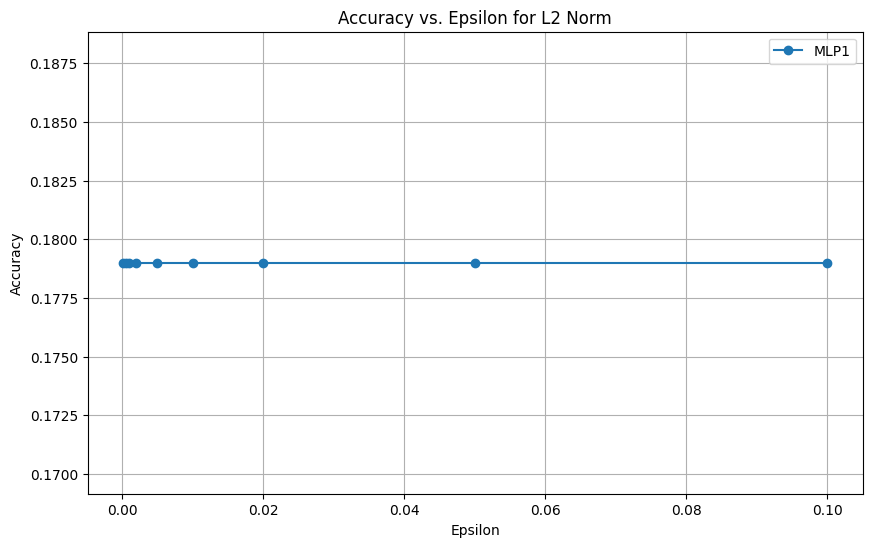

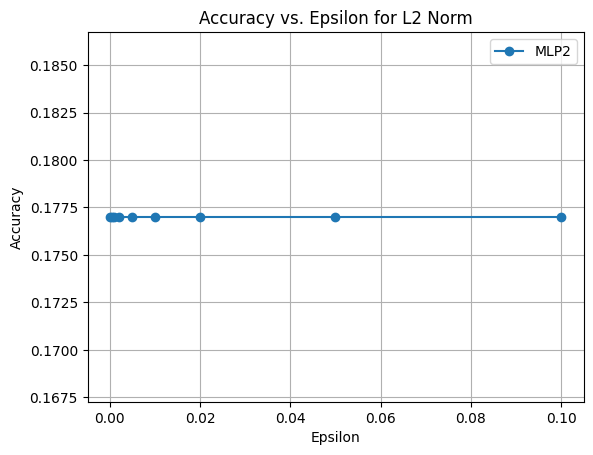

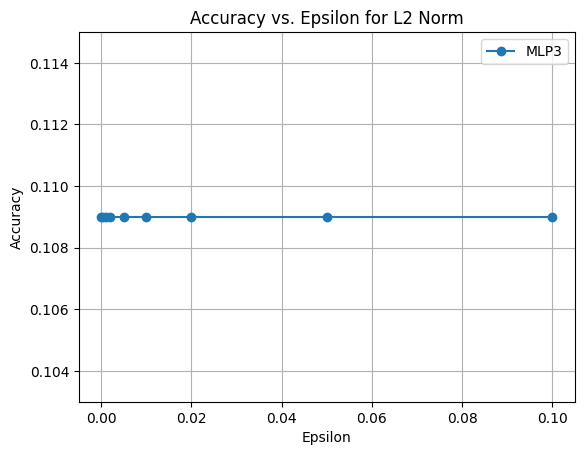

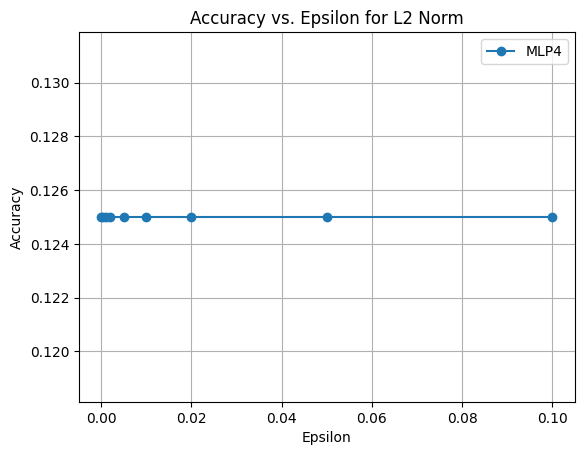

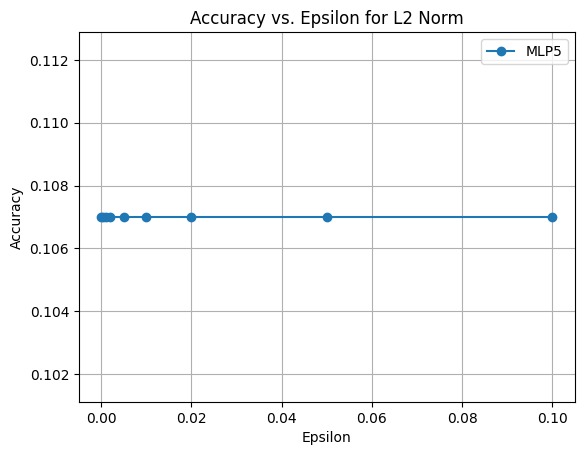

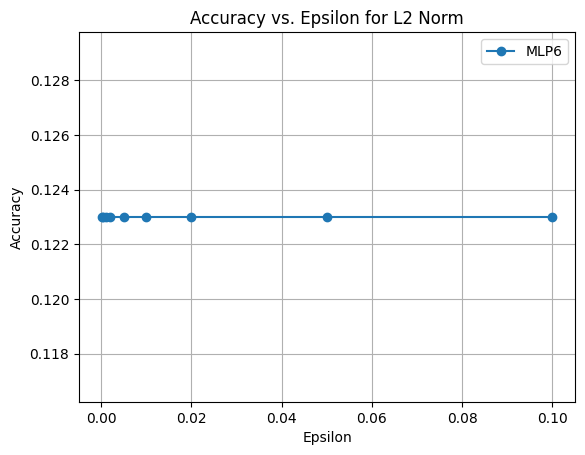

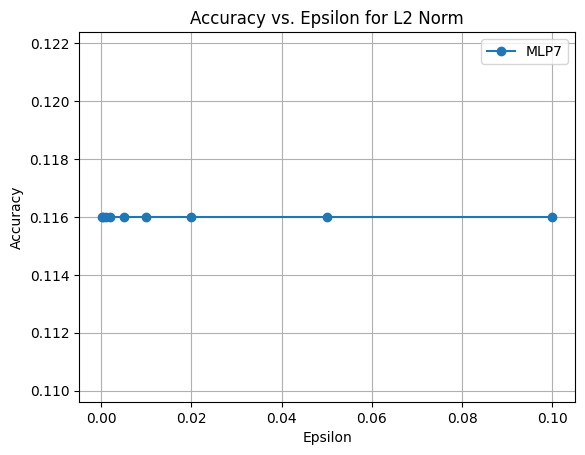

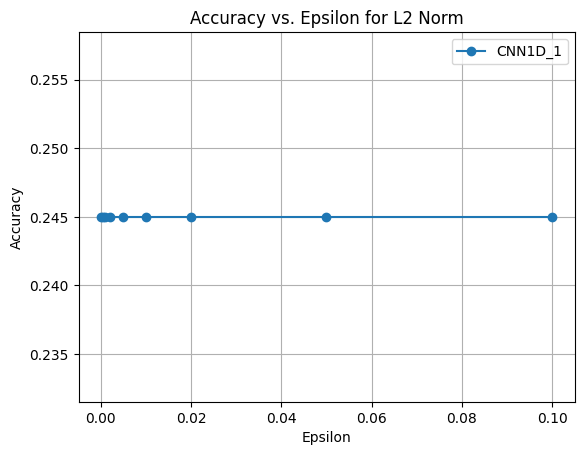

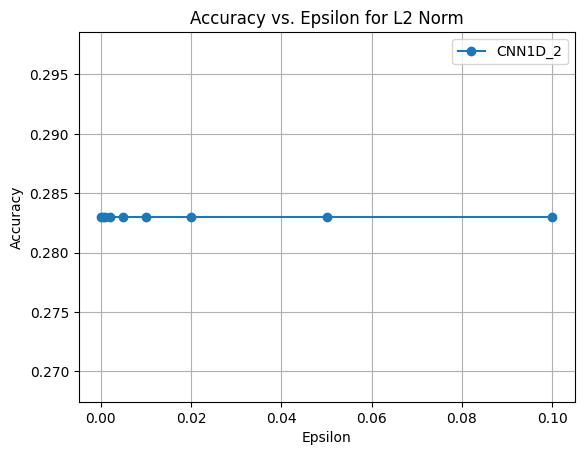

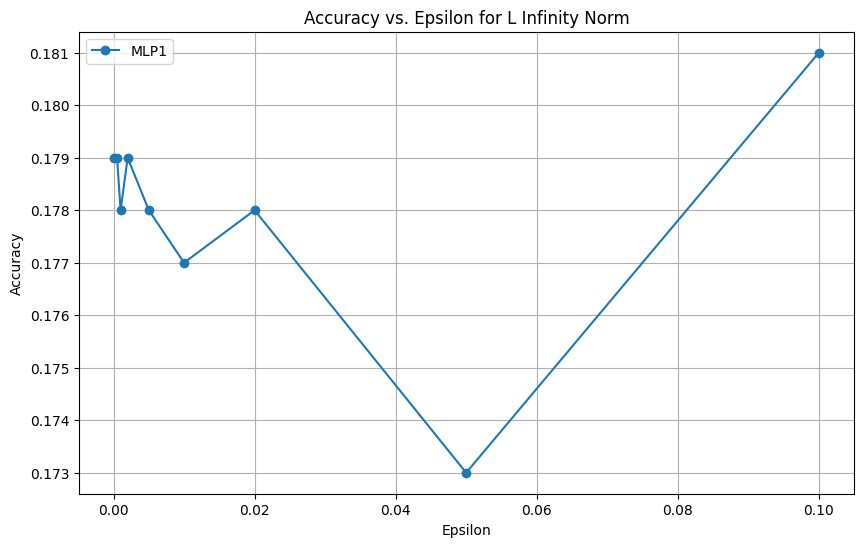

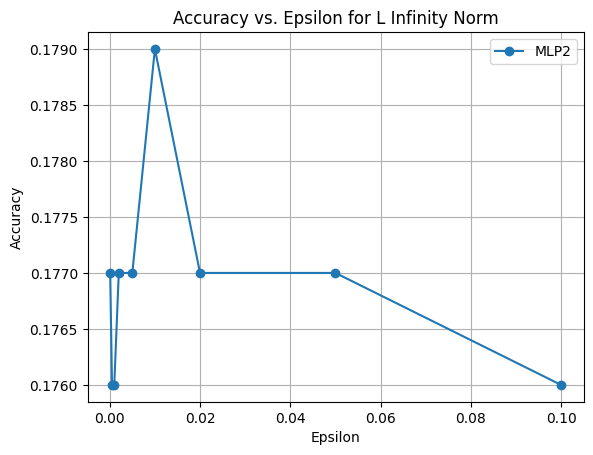

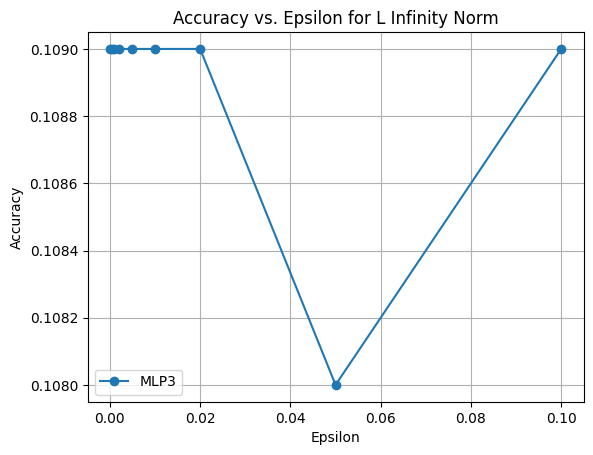

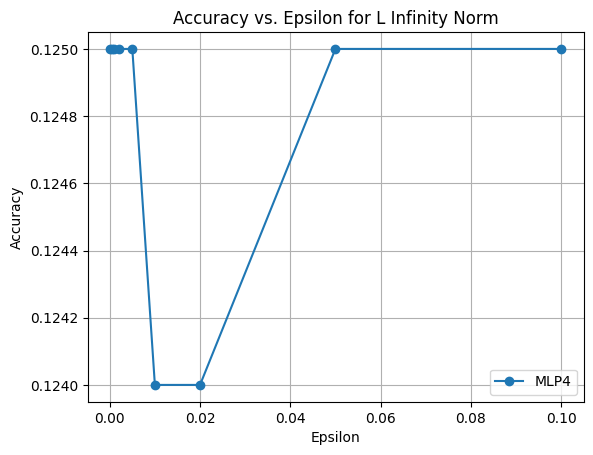

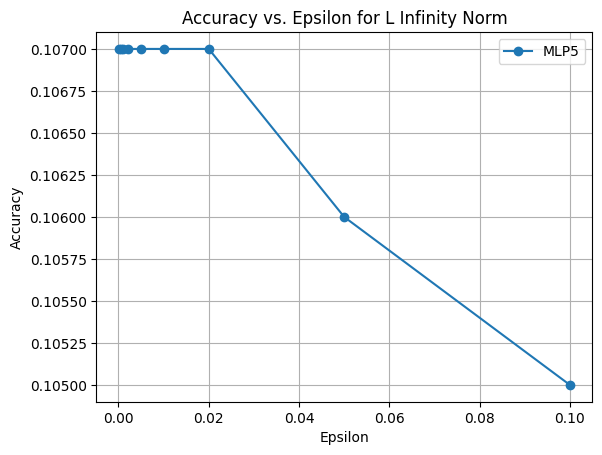

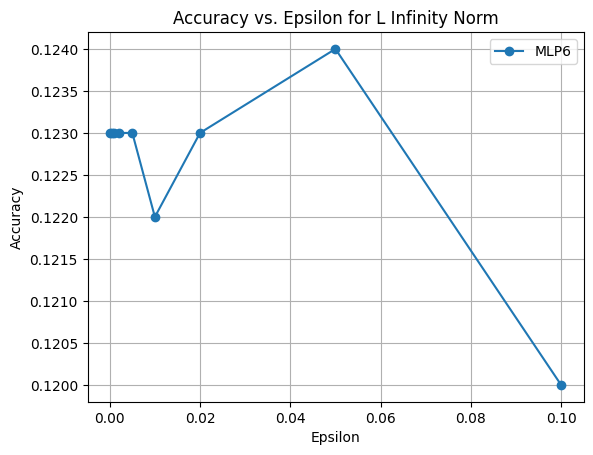

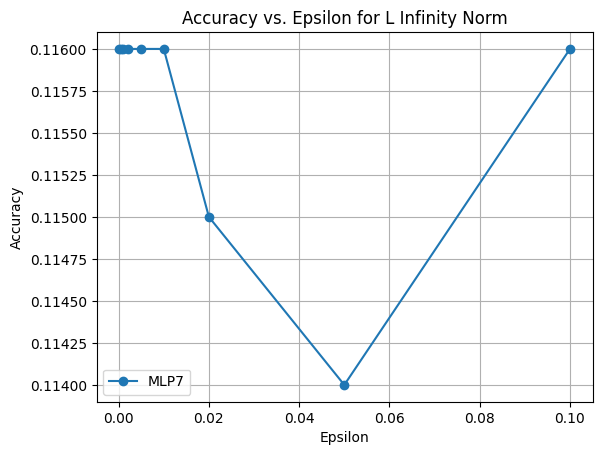

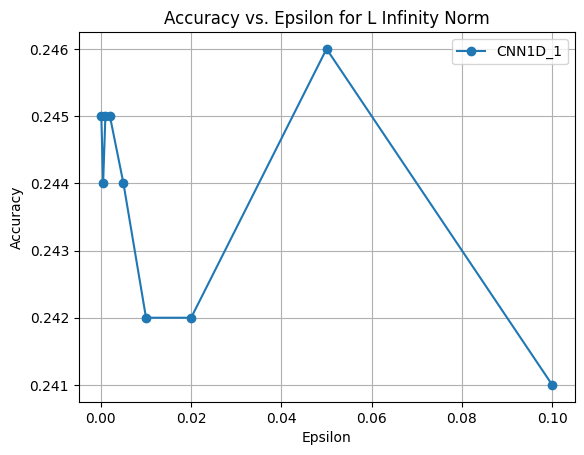

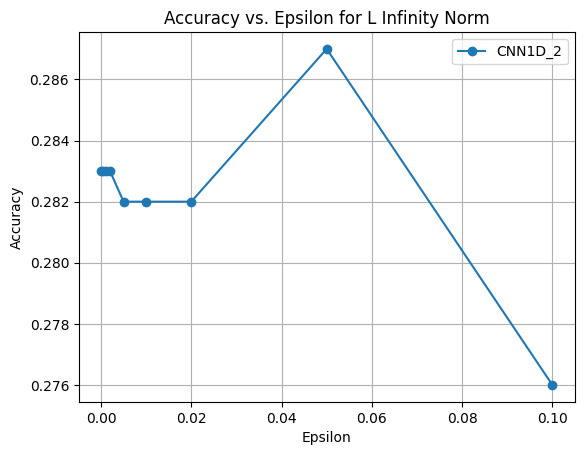

In [ ]:
import matplotlib.pyplot as plt

def showGraph(modelList,transformFunc, epsilons, desc):
  plt.figure(figsize=(10,6))

  for name,model,weights in modelList:
    accuracies = []
    for eps in epsilons:
      xMod = transformFunc(tensor_x_test,e=eps)
      model = torch.jit.load(weights,map_location=device)
      model.eval()
      with torch.no_grad():
        predictions = model(xMod).argmax(dim=1)
        accuracy = (predictions == tensor_y_test).float().mean().item()
      accuracies.append(accuracy)
    plt.plot(epsilons,accuracies,marker='o',label=name)
    plt.title(f'Accuracy vs. Epsilon for {desc}')
    plt.xlabel('Epsilon')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

epsilons = [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
showGraph(modelList,LTwo,epsilons, "L2 Norm")
showGraph(modelList,LInf,epsilons, "L Infinity Norm")